In [1]:
# This is a Regression Problem

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [4]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.shape

(500, 9)

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['Serial No.'],inplace=True)


In [9]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [10]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=943)

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [14]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [15]:
X_train_sc[0]

array([0.24      , 0.35714286, 0.5       , 0.625     , 1.        ,
       0.41328413, 0.        ])

In [16]:
# Values are Scaled

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [44]:
m=Sequential()
m.add(Dense(7,activation='relu',input_dim=7))
m.add(Dense(7,activation='relu'))
m.add(Dense(1,activation='linear'))


In [45]:
m.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
m.compile(loss='mean_squared_error',optimizer='Adam')

In [51]:
h=m.fit(X_train_sc,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 0s 11ms/step - loss: 0.2137 - val_loss: 0.1704
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1581 - val_loss: 0.1204
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1111 - val_loss: 0.0808
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0747 - val_loss: 0.0512
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0484 - val_loss: 0.0307
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0310 - val_loss: 0.0181
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0203 - val_loss: 0.0114
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.0085
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0125 - val_loss: 0.0075
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.0073
Epoch 11/100
9/9 [==========

In [52]:
y_pred=m.predict(X_test_sc)

5/5 [==============================] - 0s 2ms/step


In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_test,y_pred)

0.796676785223154

In [55]:
import matplotlib.pyplot as plt

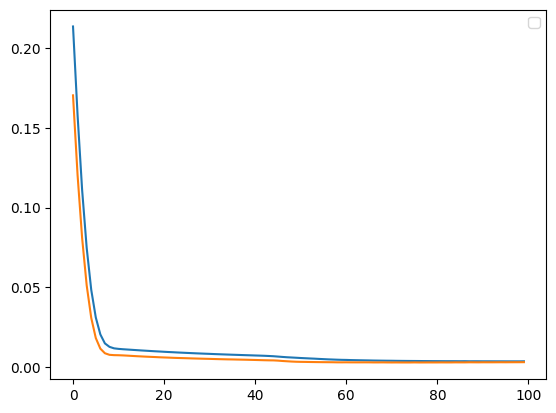

In [57]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend()